In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [145]:
coffee_shop_ds_path = "./coffee_shop_revenue.csv"
coffee_shop_ds = pd.read_csv(obesity_ds_path)
lin_reg = LinearRegression()

In [146]:
coffee_shop_ds

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


In [150]:
coffee_shop_ds.corr()["Daily_Revenue"]

Number_of_Customers_Per_Day    0.736461
Average_Order_Value            0.535694
Operating_Hours_Per_Day       -0.005323
Number_of_Employees            0.003295
Marketing_Spend_Per_Day        0.254812
Location_Foot_Traffic          0.013469
Daily_Revenue                  1.000000
Name: Daily_Revenue, dtype: float64

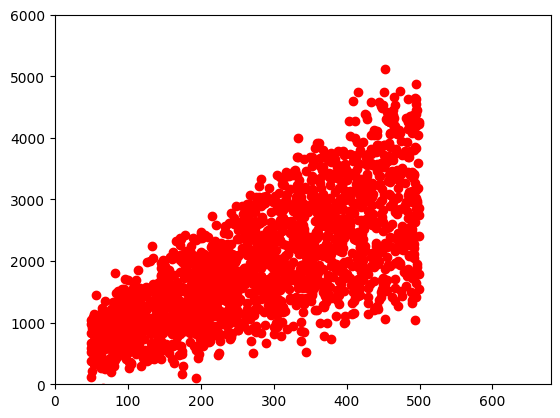

In [177]:
plt.plot(coffee_shop_ds["Number_of_Customers_Per_Day"], coffee_shop_ds["Daily_Revenue"], 'ro')
plt.axis((0, 680, 0, 6000))
plt.show()

In [154]:
msk = np.random.rand(len(coffee_shop_ds)) < 0.8
train = coffee_shop_ds[msk].copy()
test=coffee_shop_ds[~msk].copy()
print("Train data set {}, test data set {}".format(train.shape, test.shape))

Train data set (1585, 7), test data set (415, 7)


In [155]:
independent_vars = ["Number_of_Customers_Per_Day", "Average_Order_Value"]
dependent_var = ["Daily_Revenue"]
lin_reg.fit(train[independent_vars], train[dependent_var])

LinearRegression()

In [156]:
predictions = lin_reg.predict(test[independent_vars])
predictions.shape

(415, 1)

In [157]:
test["predictions"] = predictions

In [158]:
test["predictions"] = test["predictions"].apply(lambda x : 0 if x < 0 else x)

In [159]:
error = mean_absolute_error(test["Daily_Revenue"], test["predictions"])
error

308.75494359702793